## Simple Neural Network

In [116]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

In [57]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [122]:
print('Shape of X training set: ', X_train.shape)
print('Shape of an X sample: ', X_train[0].shape)
print('Shape of y train (labels): ', y_train.shape)

Shape of X training set:  (60000, 28, 28)
Shape of an X sample:  (28, 28)
Shape of y train (labels):  (60000,)


array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

### Scale the values from 0 to 255 to, 0 to 1

In [65]:
X_train = X_train / 255
X_test = X_test / 255

### Flattening the dataset

In [69]:
flattened_X_train = X_train.reshape(len(X_train), 28*28)
flattened_X_test = X_test.reshape(len(X_test), 28*28)
flattened_X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Model building

In [70]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(flattened_X_test.shape[1],), activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


### Model training

In [71]:
history = model.fit(flattened_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 862us/step - loss: 0.4690 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 2s 894us/step - loss: 0.3039 - accuracy: 0.9151
Epoch 3/5
1875/1875 [==============================] - 2s 806us/step - loss: 0.2832 - accuracy: 0.9209
Epoch 4/5
1875/1875 [==============================] - 2s 854us/step - loss: 0.2731 - accuracy: 0.9230
Epoch 5/5
1875/1875 [==============================] - 2s 848us/step - loss: 0.2670 - accuracy: 0.9249


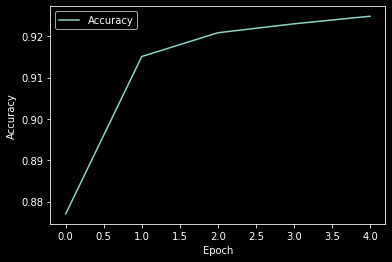

In [72]:
import pandas as pd
plt.plot(pd.DataFrame(history.history['accuracy']), label='Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

### Model evaluation

In [73]:
model.evaluate(flattened_X_test, y_test)

313/313 [==============================] - 0s 859us/step - loss: 0.2690 - accuracy: 0.9248


[0.2690238952636719, 0.9247999787330627]

### Test classification function

313/313 [==============================] - 0s 681us/step
Prediction:  0


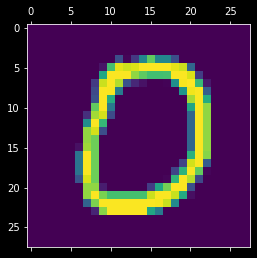

In [95]:
predicted_y = model.predict(flattened_X_test)

def classify(index):
    plt.matshow(X_test[index])
    print('Prediction: ',predicted_y[index].argmax())

classify(10)

### Confusion Matrix

Text(33.0, 0.5, 'Truth')

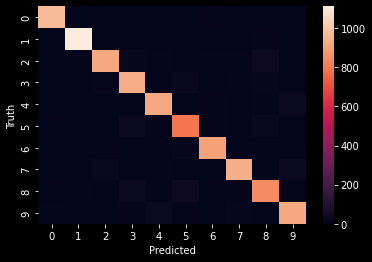

In [109]:
predicted_y_labels = [x.argmax() for x in predicted_y]
matrix = tf.math.confusion_matrix(labels=y_test, predictions=predicted_y_labels)

import seaborn as sn
sn.heatmap(matrix)
plt.xlabel('Predicted')
plt.ylabel('Truth')